In [206]:
! pip install plotly
! pip install folium

In [207]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

In [208]:
# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

# For serialization and deserialization of data from/to file
import pickle

In [209]:
import folium

In [210]:
# read the json file from your data folder into a data frame
#df = pd.read_csv(r'C:\Users\chz\Documents\BI Exercise\\BI Exam\global air pollution dataset.csv')
df = pd.read_csv(r'DataSæt\global air pollution dataset.csv')

In [211]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [212]:
df.shape

(23463, 12)

In [213]:
df.isnull().sum()

Country               422
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [214]:
# Remove rows with missing 'Country' and  'cities' values and create a cleaned DataFrame
df_cleaned = df.dropna(subset=['Country', 'City'])

In [215]:
df_cleaned.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [216]:
df = df_cleaned

In [217]:
df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [218]:
df.sample(50)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
16091,India,Jharia,186,Unhealthy,2,Good,115,Unhealthy for Sensitive Groups,2,Good,186,Unhealthy
2389,Slovakia,Senica,64,Moderate,1,Good,39,Good,1,Good,64,Moderate
12864,Mexico,Tenango De Arista,177,Unhealthy,4,Good,7,Good,22,Good,177,Unhealthy
13369,Sweden,Vastervik,38,Good,1,Good,38,Good,0,Good,9,Good
4071,Japan,Namie,54,Moderate,1,Good,53,Moderate,1,Good,54,Moderate
8847,Peru,Lima,110,Unhealthy for Sensitive Groups,4,Good,16,Good,9,Good,110,Unhealthy for Sensitive Groups
9156,Sweden,Kumla,41,Good,1,Good,41,Good,0,Good,12,Good
4262,Japan,Ebina,73,Moderate,1,Good,32,Good,9,Good,73,Moderate
13665,Romania,Sighisoara,63,Moderate,1,Good,42,Good,0,Good,63,Moderate
21416,Peru,Ilo,18,Good,0,Good,18,Good,3,Good,16,Good


In [219]:
denmark_df = df[df['Country'] == 'Denmark']

In [220]:
print(denmark_df)

       Country           City  AQI Value AQI Category  CO AQI Value  \
162    Denmark  Frederikssund         36         Good             1   
1045   Denmark   Greve Strand         39         Good             0   
1357   Denmark       Ringsted         36         Good             0   
1488   Denmark           Nuuk         23         Good             1   
1946   Denmark          Skive         38         Good             0   
...        ...            ...        ...          ...           ...   
20889  Denmark          Farum         39         Good             0   
21214  Denmark       Hillerod         44         Good             1   
21340  Denmark       Slagelse         44         Good             1   
21770  Denmark         Viborg         34         Good             1   
23049  Denmark           Koge         35         Good             0   

      CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
162              Good               36               Good              

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23040 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23040 non-null  object
 1   City                23040 non-null  object
 2   AQI Value           23040 non-null  int64 
 3   AQI Category        23040 non-null  object
 4   CO AQI Value        23040 non-null  int64 
 5   CO AQI Category     23040 non-null  object
 6   Ozone AQI Value     23040 non-null  int64 
 7   Ozone AQI Category  23040 non-null  object
 8   NO2 AQI Value       23040 non-null  int64 
 9   NO2 AQI Category    23040 non-null  object
 10  PM2.5 AQI Value     23040 non-null  int64 
 11  PM2.5 AQI Category  23040 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.3+ MB


In [222]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000
mean,72.346311,1.376562,35.231641,3.085590,68.884852
std,56.359989,1.845137,28.234091,5.282214,55.057677
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,80.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


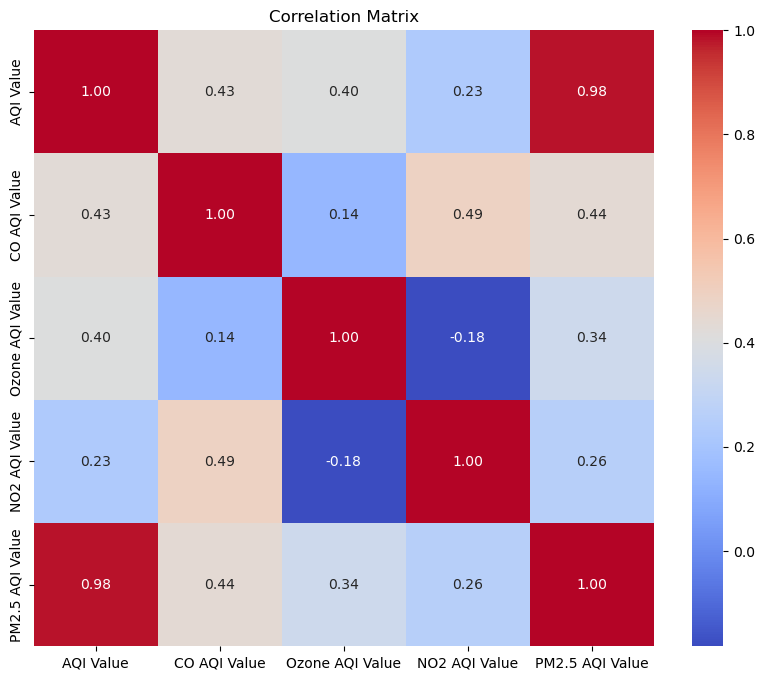

In [223]:
# We have to convert the data from float to int in order to use pandas to calculate the correlations
numeric_df = df.select_dtypes(include=['float64', 'int64'])


df_cleaned = numeric_df.dropna()
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

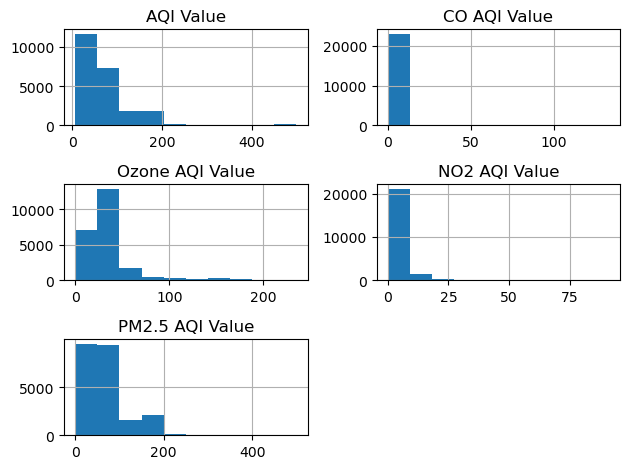

In [224]:
plt.figure(figsize= (10, 6))

# Plot histograms for all columns in the DataFrame
df.hist()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

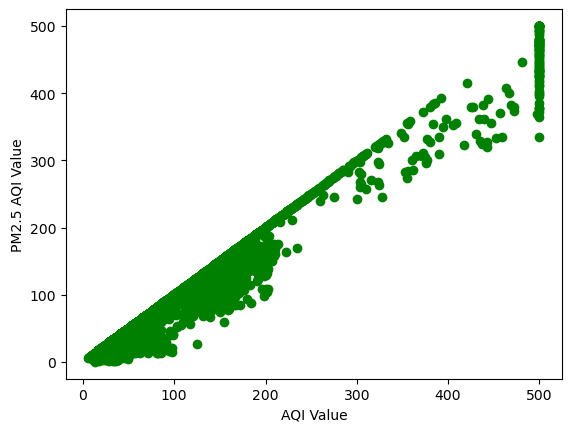

In [225]:
plt.xlabel('AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.scatter(df['AQI Value'], df['PM2.5 AQI Value'], color='green')
plt.show()

C:\Users\tobia\AppData\Local\Temp\ipykernel_20944\1350621379.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='AQI Value', ylabel='Density'>

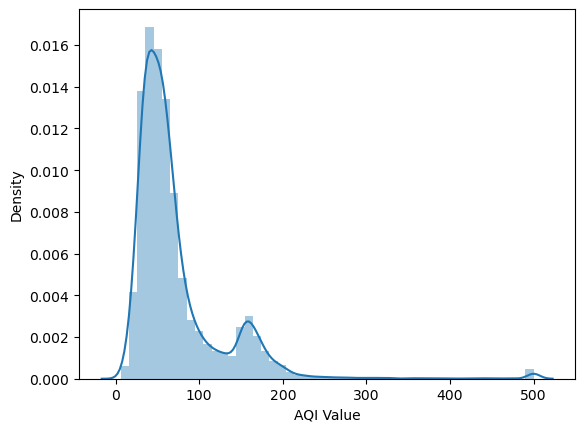

In [226]:
sns.distplot(df['AQI Value'],  label='AQI Value', norm_hist=True)  

C:\Users\tobia\AppData\Local\Temp\ipykernel_20944\1301984605.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='PM2.5 AQI Value', ylabel='Density'>

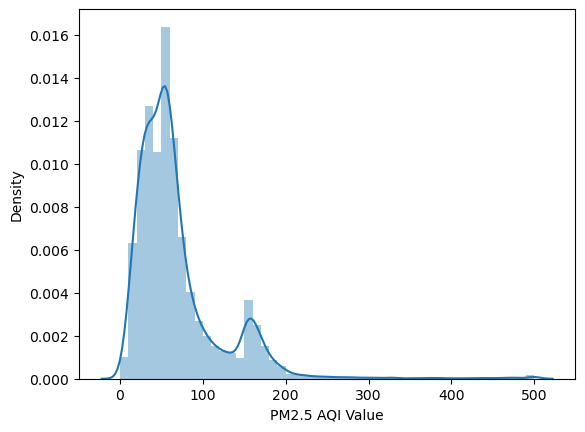

In [227]:
sns.distplot(df['PM2.5 AQI Value'],  label='PM2.5 AQI Value', norm_hist=True) 

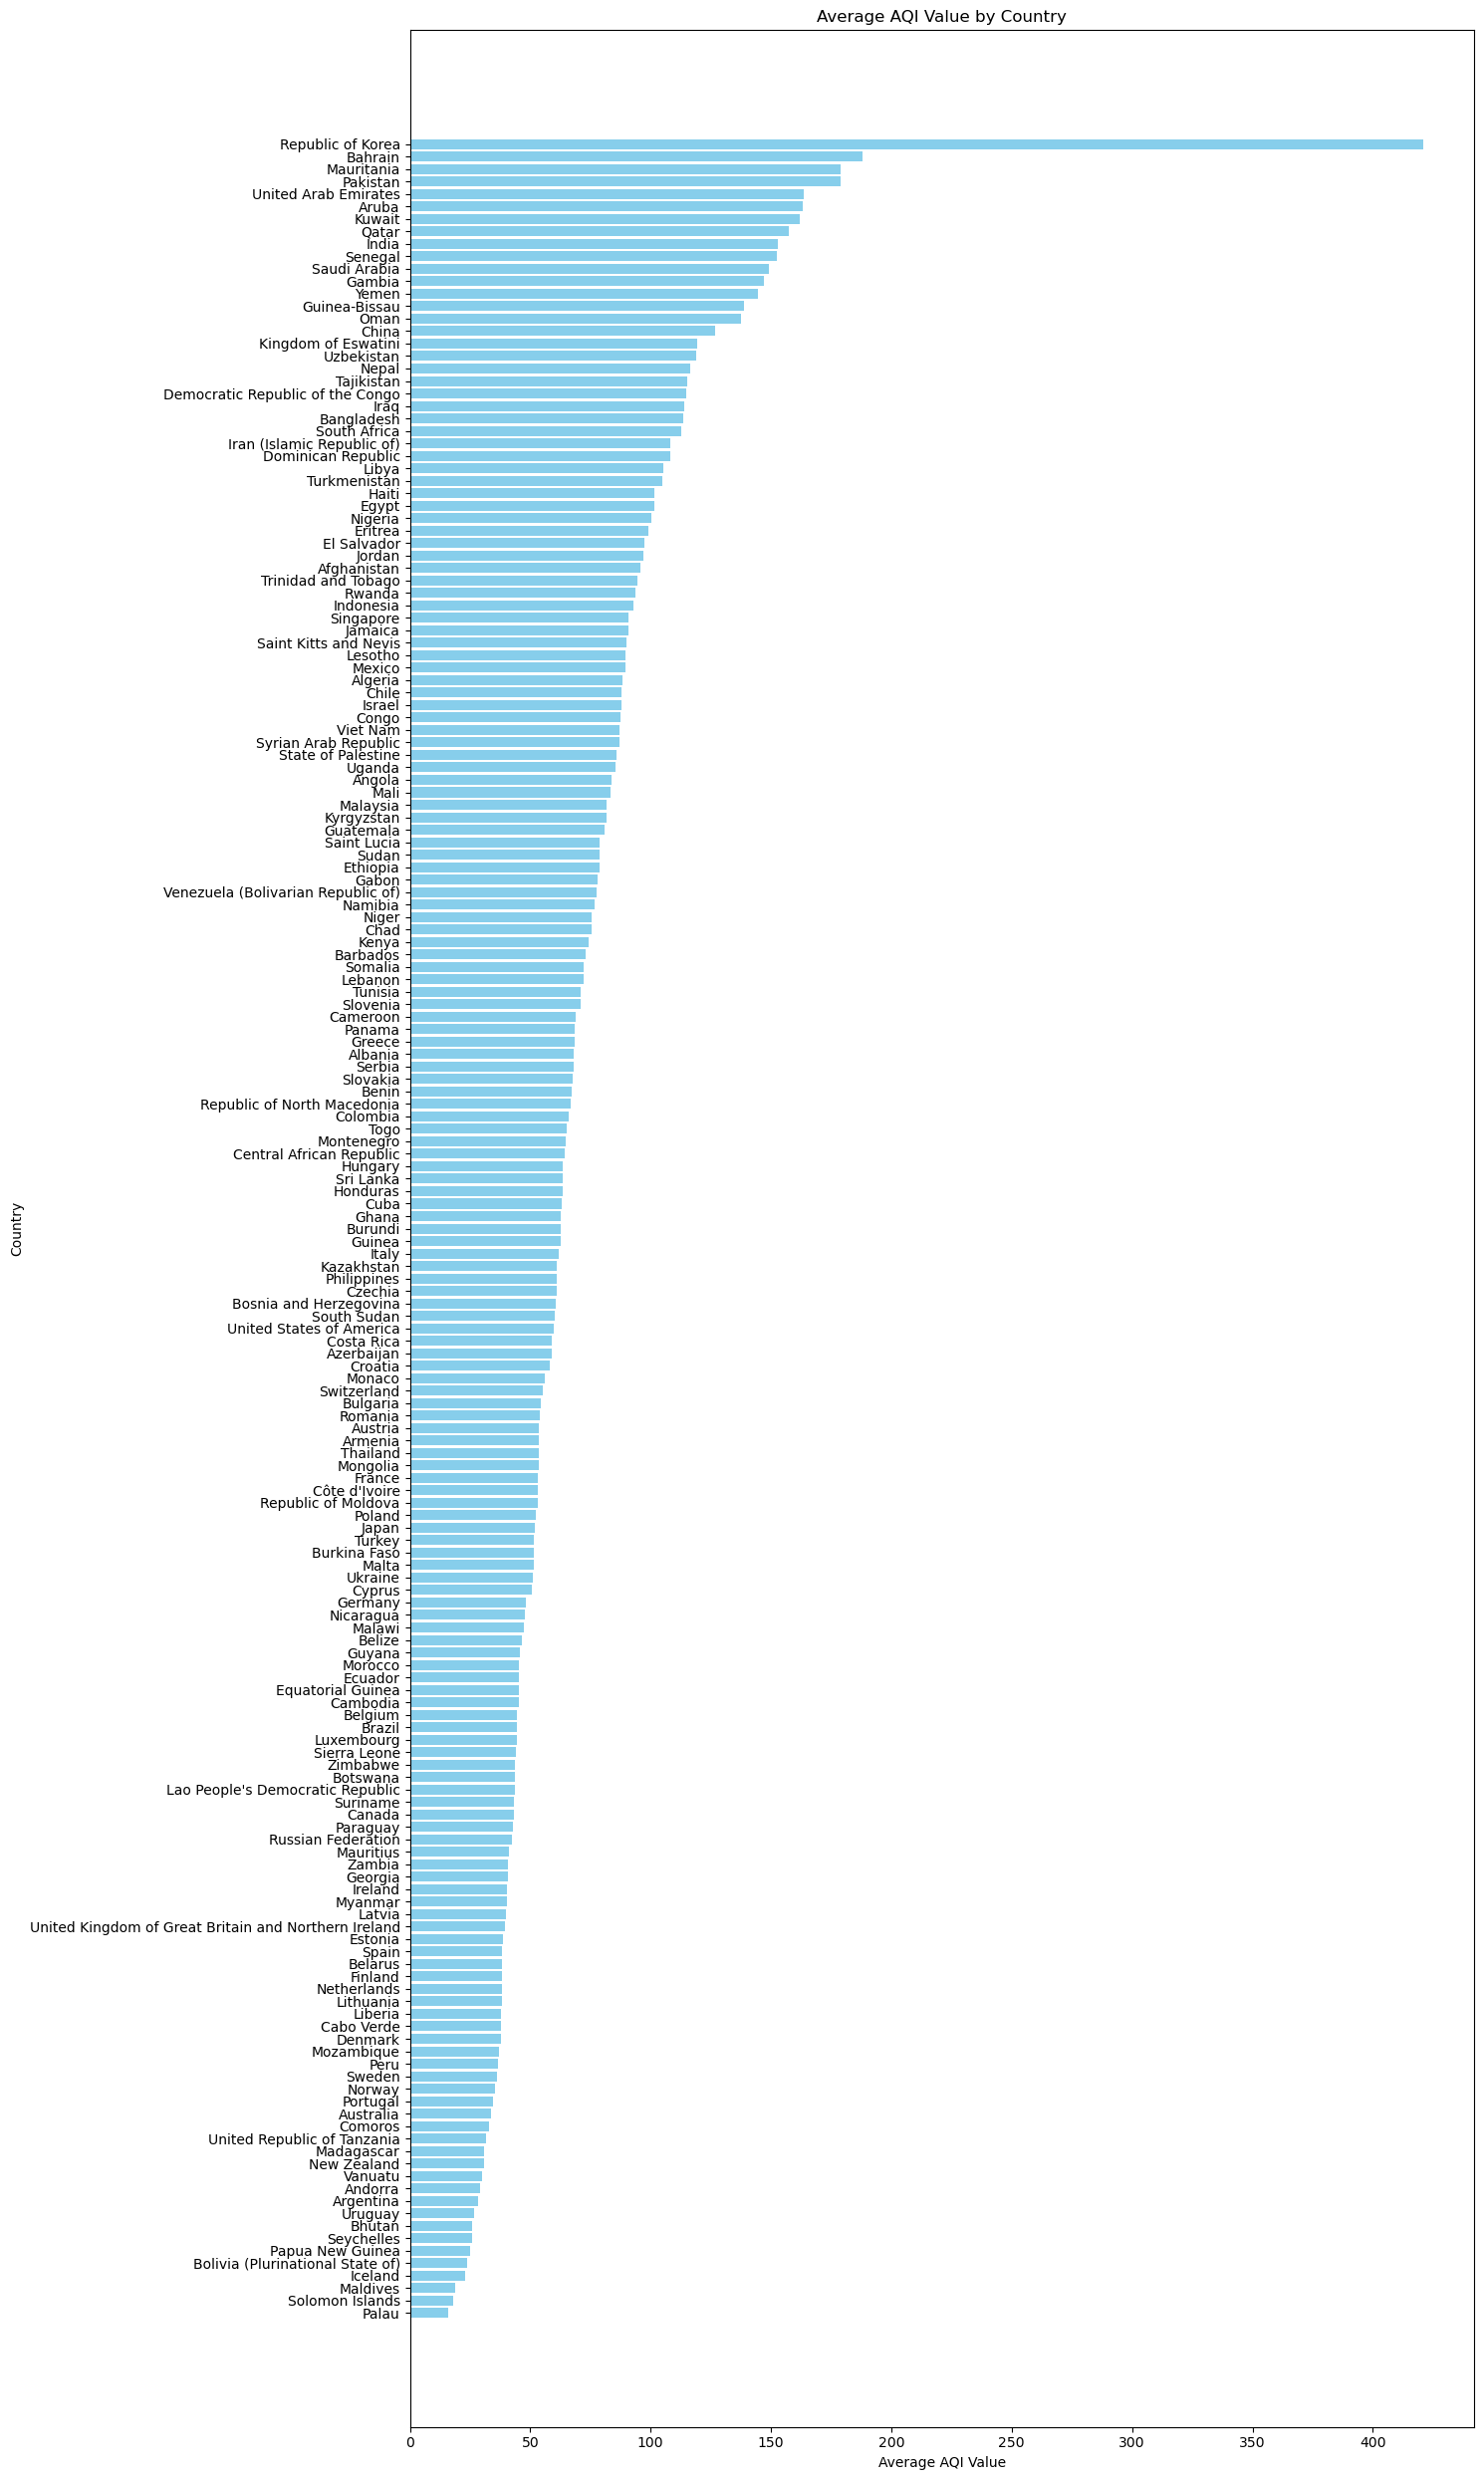

In [228]:
# Grouping the data by 'Country' and calculating the mean 'AQI Value' for each country
country_aqi_means = df.groupby('Country')['AQI Value'].mean()

# Sorting the countries by AQI value for better visualization
country_aqi_means = country_aqi_means.sort_values()

# Creating the bar chart
plt.figure(figsize=(15, 25)) 
plt.barh(country_aqi_means.index, country_aqi_means.values, color='skyblue') # Horizontal bar chart
plt.xlabel('Average AQI Value')
plt.ylabel('Country')
plt.title('Average AQI Value by Country')
plt.tight_layout() # Adjusts subplot params so that the subplot(s) fits in to the figure area.

plt.show()

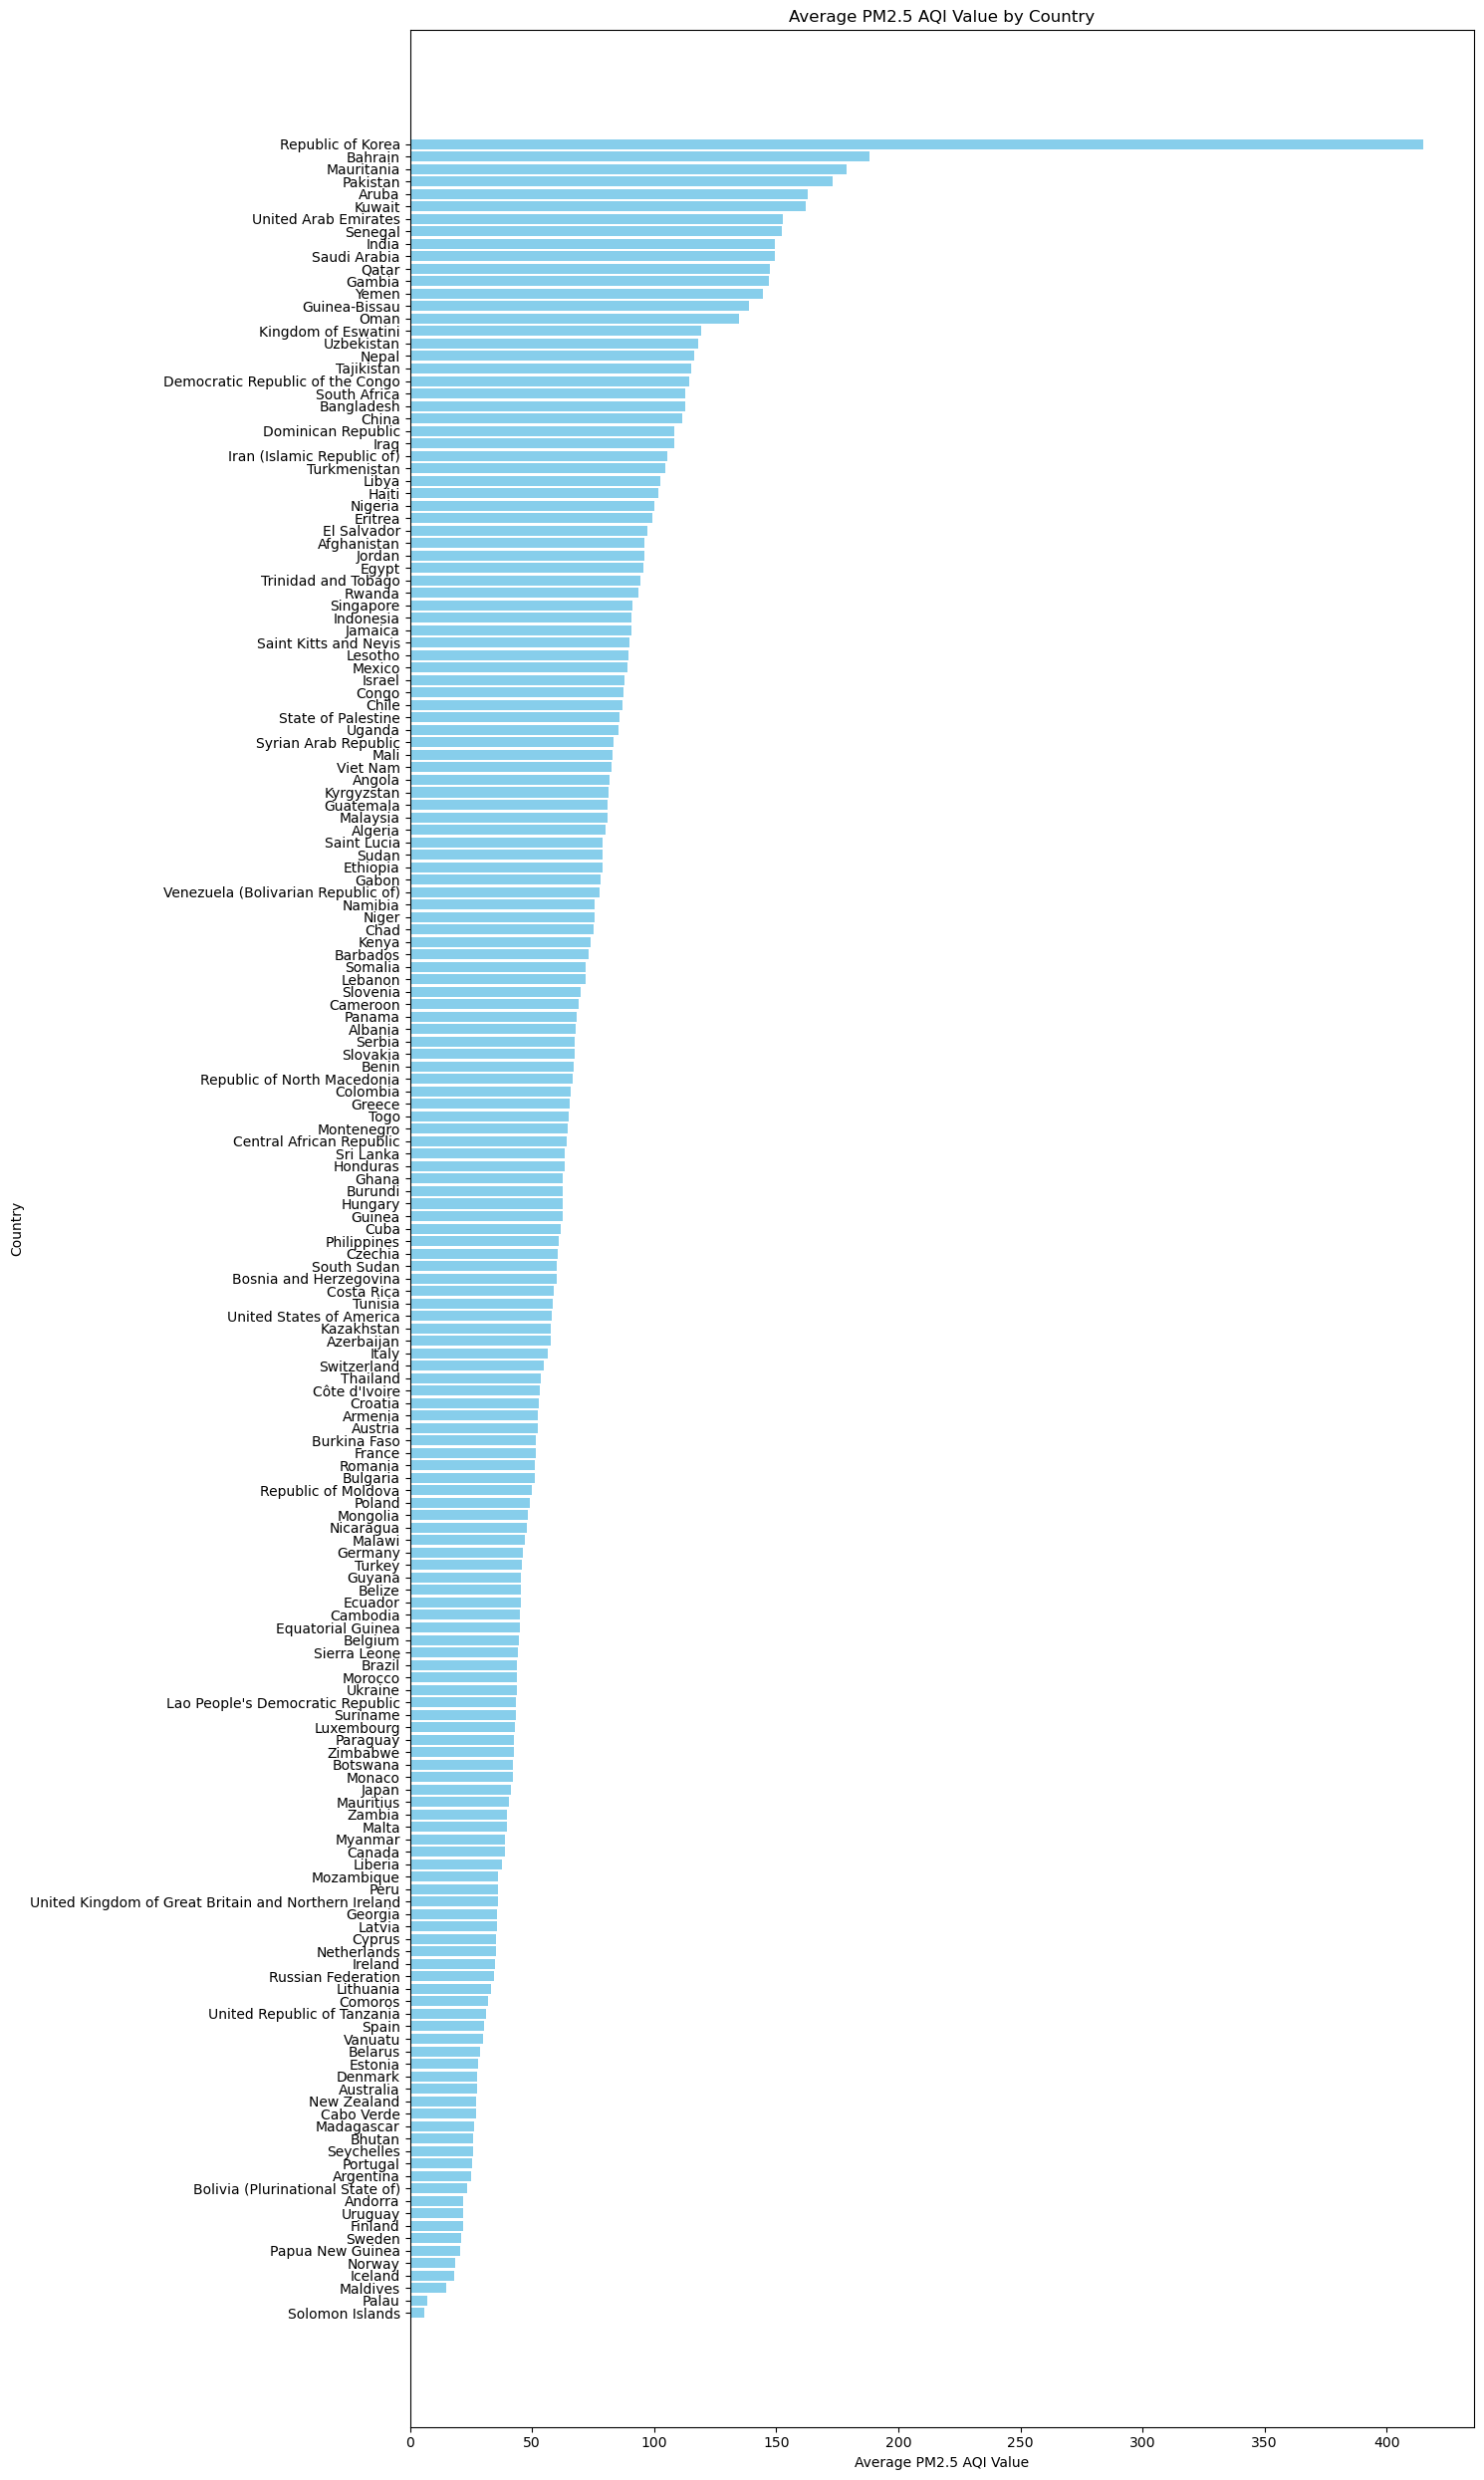

In [229]:
# Grouping the data by 'Country' and calculating the mean 'PM2.5 AQI Value' for each country
country_pm25_means = df.groupby('Country')['PM2.5 AQI Value'].mean()
# Sorting the countries by PM2.5 AQI value for better visualization
country_pm25_means = country_pm25_means.sort_values()
# Creating the bar chart
plt.figure(figsize=(15, 25))
plt.barh(country_pm25_means.index, country_pm25_means.values, color='skyblue') # Horizontal bar chart
plt.xlabel('Average PM2.5 AQI Value')
plt.ylabel('Country')
plt.title('Average PM2.5 AQI Value by Country')
plt.tight_layout() # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()


In [230]:
#create a scatter plot of the 'AQI Value' and 'PM2.5 AQI Value' columns and color the points by the 'Country' column
fig = px.scatter(df, x='AQI Value', y='PM2.5 AQI Value', color='Country', title='AQI Value vs PM2.5 AQI Value')
fig.show()


In [231]:
# divide the data into 5 clusters using the KMeans algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['AQI Value', 'PM2.5 AQI Value']])
df['cluster'] = kmeans.predict(df[['AQI Value', 'PM2.5 AQI Value']])
df.sample(10)



c:\Users\tobia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,cluster
14084,United States of America,Middle Valley,56,Moderate,2,Good,44,Good,3,Good,56,Moderate,0
17350,Japan,Arai,65,Moderate,2,Good,52,Moderate,2,Good,65,Moderate,0
13905,China,Daokou,176,Unhealthy,5,Good,176,Unhealthy,8,Good,173,Unhealthy,1
20800,Switzerland,Wallisellen,58,Moderate,1,Good,55,Moderate,0,Good,58,Moderate,0
18783,United States of America,Brownsburg,54,Moderate,1,Good,33,Good,9,Good,54,Moderate,0
6980,Spain,Nerja,39,Good,1,Good,18,Good,4,Good,39,Good,2
17755,India,Jhusi,210,Very Unhealthy,1,Good,42,Good,1,Good,210,Very Unhealthy,1
3290,Japan,Kiryu,34,Good,1,Good,19,Good,4,Good,34,Good,2
19094,South Africa,Fort Beaufort,46,Good,1,Good,26,Good,0,Good,46,Good,2
5011,Bulgaria,Asenovgrad,76,Moderate,1,Good,43,Good,0,Good,76,Moderate,0


In [232]:
# create a scatter plot of the 'AQI Value' and 'PM2.5 AQI Value' columns and color the points by the 'cluster' column
fig = px.scatter(df, x='AQI Value', y='PM2.5 AQI Value', color='cluster', title='AQI Value vs PM2.5 AQI Value')
fig.show()


C40 is a initiative where cities around the world participate to make a difference in the battle against climate change. The goal is to reduce greenhouse gas emissions and improve the quality of life in cities. The C40 cities are committed to addressing climate change and to work together to share knowledge and best practices.


In [233]:



# List of known C40 member cities
c40_member_cities = [
    "Addis Abeba", "Amman", "Athens", "Austin", "Bangkok", "Barcelona", "Berlin",
    "Bogota", "Boston", "Buenos Aires", "Cape Town", "Caracas", "Chicago", "Copenhagen",
    "Dakar", "Delhi", "Dhaka", "Dubai", "Durban", "Hanoi", "Heidelberg", "Helsinki",
    "Ho Chi Minh City", "Hong Kong", "Houston", "Istanbul", "Jakarta", "Johannesburg",
    "Karachi", "Kolkata", "Lagos", "Lima", "Lisbon", "London", "Los Angeles", "Madrid",
    "Medellin", "Melbourne", "Mexico City", "Milan", "Montreal", "Moscow", "Mumbai",
    "Nairobi", "New York", "Osaka", "Oslo", "Paris", "Philadelphia", "Portland",
    "Quebec", "Rio De Janeiro", "Rome", "Rotterdam", "San Francisco", "Santiago",
    "Sao Paulo", "Seoul", "Shanghai", "Shenzhen", "Singapore", "Stockholm", "Sydney",
    "Taipei", "Tel Aviv Yafo", "Tokyo", "Toronto", "Tshwane", "Vancouver", "Venice", "Vienna",
    "Warsaw", "Washington", "Wuhan", "Zurich"
]

# Filter DataFrame to include only C40 member cities
c40_df = df[df['City'].isin(c40_member_cities)]

# Identify cities that don't exist in the dataset
non_existing_cities = list(set(c40_member_cities) - set(c40_df['City']))

# Output results
print("Cities that are members of the C40 initiative and exist in the dataset:")
print(c40_df)

print("\nCities that are members of the C40 initiative but don't exist in the dataset:")
print(non_existing_cities)


Cities that are members of the C40 initiative and exist in the dataset:
                        Country           City  AQI Value  \
746                 Philippines       Medellin         78   
770    United States of America         Moscow         30   
1321   United States of America    Los Angeles        116   
1328                      China       Shenzhen        154   
1402          Republic of Korea          Seoul        421   
...                         ...            ...        ...   
22426                  Ethiopia    Addis Abeba         59   
23002  United States of America         Boston         44   
23083  United States of America         Vienna         45   
23255                    Israel  Tel Aviv Yafo        127   
23303  United States of America         Venice         55   

                         AQI Category  CO AQI Value CO AQI Category  \
746                          Moderate             1            Good   
770                              Good             1  

In [234]:
c40_df.sample(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,cluster
12373,United Kingdom of Great Britain and Northern I...,London,40,Good,1,Good,11,Good,11,Good,40,Good,2
2584,Costa Rica,San Francisco,58,Moderate,1,Good,9,Good,7,Good,58,Moderate,0
13435,India,Dhaka,235,Very Unhealthy,3,Good,158,Unhealthy,1,Good,235,Very Unhealthy,1
2983,Pakistan,Karachi,151,Unhealthy,2,Good,18,Good,4,Good,151,Unhealthy,1
23255,Israel,Tel Aviv Yafo,127,Unhealthy for Sensitive Groups,2,Good,39,Good,11,Good,127,Unhealthy for Sensitive Groups,4
20492,United States of America,Washington,66,Moderate,2,Good,32,Good,7,Good,66,Moderate,0
19185,United States of America,Vancouver,49,Good,1,Good,20,Good,10,Good,49,Good,0
19004,Colombia,Madrid,96,Moderate,3,Good,7,Good,11,Good,96,Moderate,4
22426,Ethiopia,Addis Abeba,59,Moderate,1,Good,24,Good,0,Good,59,Moderate,0
5335,China,Wuhan,175,Unhealthy,6,Good,175,Unhealthy,6,Good,157,Unhealthy,1


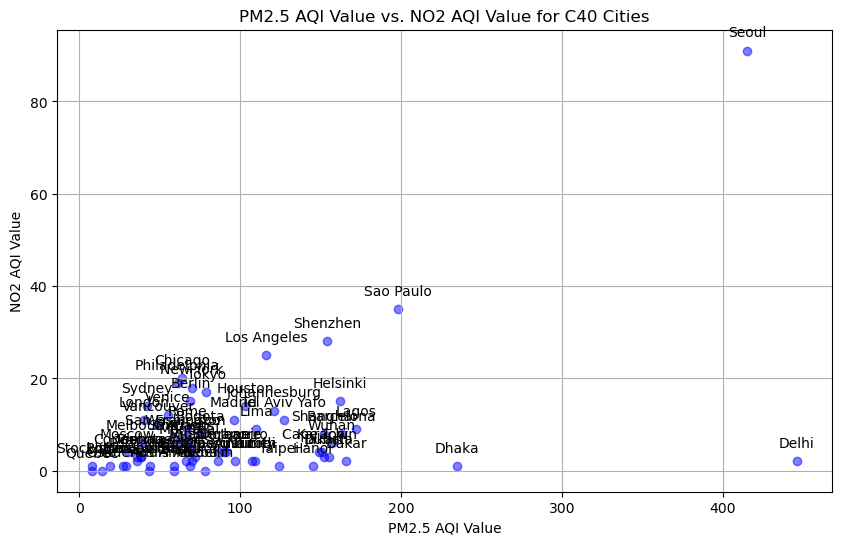

In [236]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called df
# and it contains columns 'City', 'PM2.5 AQI Value', and 'NO2 AQI Value'

# Filter the DataFrame to include only C40 cities
c40_cities_df = df[df['City'].isin(c40_member_cities)]

# Plot PM2.5 AQI Value vs. NO2 AQI Value for C40 cities
plt.figure(figsize=(10, 6))
plt.scatter(c40_cities_df['PM2.5 AQI Value'], c40_cities_df['NO2 AQI Value'], color='blue', alpha=0.5)

# Add labels and grid
plt.title('PM2.5 AQI Value vs. NO2 AQI Value for C40 Cities')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('NO2 AQI Value')
plt.grid(True)

# Add city names as annotations
for i, city in c40_cities_df.iterrows():
    plt.annotate(city['City'], (city['PM2.5 AQI Value'], city['NO2 AQI Value']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

